In [1]:
import cv2
import numpy as np
from sklearn.decomposition import KernelPCA, PCA
import torch

In [35]:
scale = 4
aniso = True
dim=21
phase = "train"
ks = torch.load(f"kernels/{phase}/kernel_scale{int(scale)}_{'aniso' if aniso else 'iso'}_dim{dim}_diverse.pth")

In [36]:
ks.keys()

dict_keys(['pca', 'kernels', 'stddevs', 'k_reduced', 'k_recon', 'scale', 'aniso', 'stddevs2'])

In [37]:
ks['stddevs'][0]

2.375728614138369

In [38]:
len(ks['stddevs'])

10000

In [40]:
test_ks = dict(pca=ks['pca'], scale=ks['scale'], aniso=ks['aniso'], stddevs2=[], kernels=[], stddevs=[], k_reduced=[], k_recon=[])
keys = ['kernels', 'stddevs', 'k_reduced', 'k_recon', 'stddevs2']
np.random.seed(0)
idxs = list(range(len(ks['stddevs']))) 
np.random.shuffle(idxs)
for i in idxs:
    if 0.8 < ks['stddevs'][i] < 3.2:
        if 0.8 < ks['stddevs2'][i] < 3.2:
            for key in keys:
                test_ks[key].append(ks[key][i])
    if len(test_ks['stddevs']) >= 50:
        break

In [41]:
len(test_ks['kernels'])

50

In [24]:
test_ks[
    'stddevs'
]

[2.1938473115079633,
 1.2271745303130492,
 1.0125114896811735,
 1.92958961680988,
 2.604660765654807,
 1.770681535573098,
 2.3573109842735747,
 1.3959390287530826,
 1.7306097803473577,
 2.162850643476223,
 3.0059727142127186,
 2.404782414463132,
 2.5547293248923046,
 0.9415903017750511,
 3.1246047414631137,
 1.0569643687262253,
 0.8106352084151118,
 1.0941274190677983,
 2.90998193428753,
 1.9374311505279325]

In [25]:
torch.save(test_ks, f"kernels/test_2/kernel_scale{int(scale)}_{'aniso' if aniso else 'iso'}_dim{dim}_diverse.pth")

In [7]:
import matplotlib.pyplot as plt

In [12]:
test_ks.keys()

dict_keys(['pca', 'scale', 'aniso', 'kernels', 'stddevs', 'k_reduced', 'k_recon'])

2.1938473115079633 , 3.0131551806581136


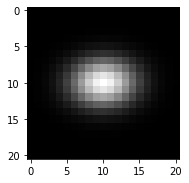

1.2271745303130492 , 1.2185275703035265


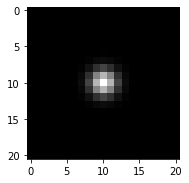

1.0125114896811735 , 1.3440603339064006


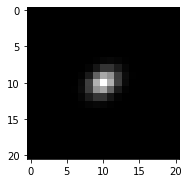

1.92958961680988 , 1.2072800339313823


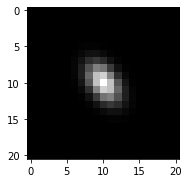

2.604660765654807 , 1.540387920861043


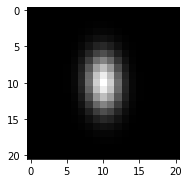

1.770681535573098 , 0.874679550795465


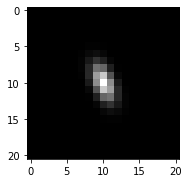

2.3573109842735747 , 2.2799046928753173


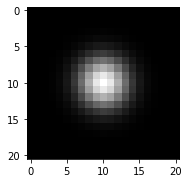

1.3959390287530826 , 2.222834509565695


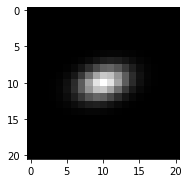

1.7306097803473577 , 1.1612996033219583


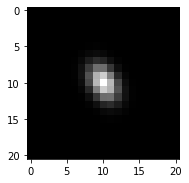

2.162850643476223 , 2.9104145714352287


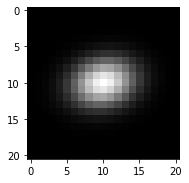

3.0059727142127186 , 2.3847551080695037


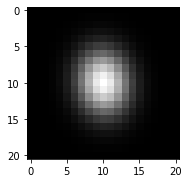

2.404782414463132 , 2.6415949491712944


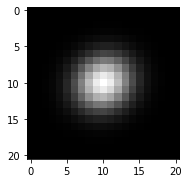

2.5547293248923046 , 2.865001290354505


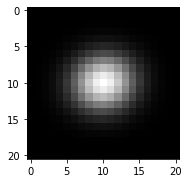

0.9415903017750511 , 1.5027138359857135


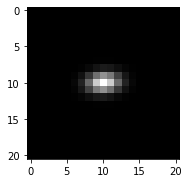

3.1246047414631137 , 2.9551681586286516


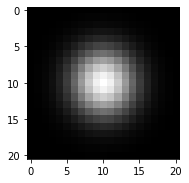

1.0569643687262253 , 2.5787520150383774


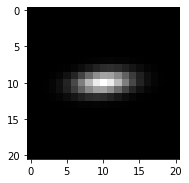

0.8106352084151118 , 2.2014413691323487


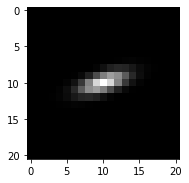

1.0941274190677983 , 1.5460461534193506


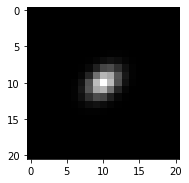

2.90998193428753 , 2.2800841326659116


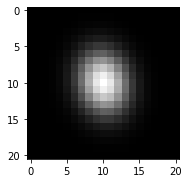

1.9374311505279325 , 2.6333251643056474


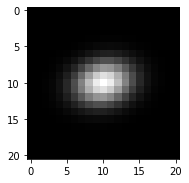

1.5737479941110628 , 2.238818937500043


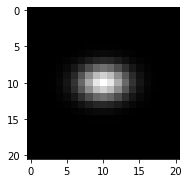

0.9881835566194965 , 2.6072074432097327


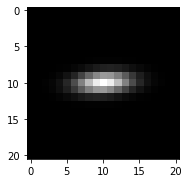

1.7290513987572256 , 2.8187434167558614


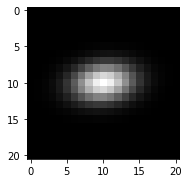

1.0241569983676428 , 2.5006430971224654


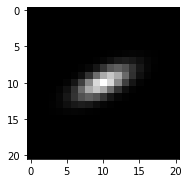

2.7245643886680626 , 1.7682851312941188


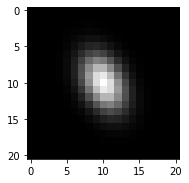

2.7267402992123326 , 3.030239215342002


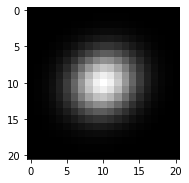

1.2297103993313367 , 2.1574177294226757


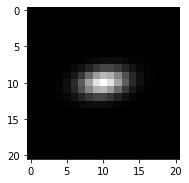

1.486711722151992 , 2.8888483935567186


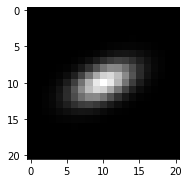

1.9240840980861975 , 1.2893255565687587


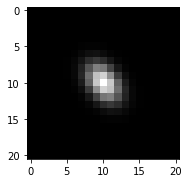

2.53676002792009 , 1.1747645451083566


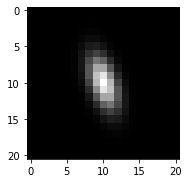

1.02388675175773 , 2.750263061813208


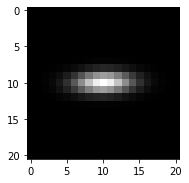

1.1730200203900392 , 2.6380248146742598


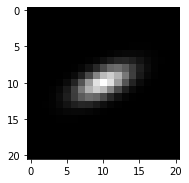

1.8895655490421963 , 0.9453496281022942


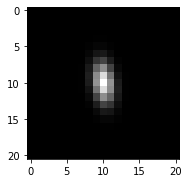

1.646189941462477 , 1.4566441075111967


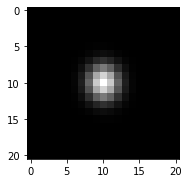

3.010097181610925 , 1.2634397212814537


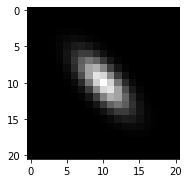

1.675617566203726 , 2.2220813901045036


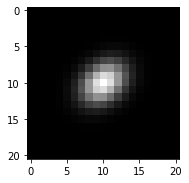

0.8375895703165914 , 1.0254072962183498


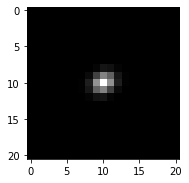

1.0671456581826793 , 2.5561083520902232


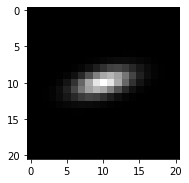

1.0172747955289128 , 2.6484879681311844


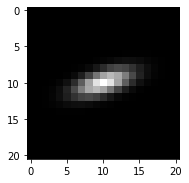

2.83842959080374 , 3.0850872300162018


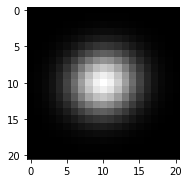

1.715940501225075 , 1.1245603567391156


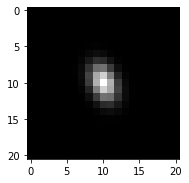

1.0470528246451654 , 2.472032645631839


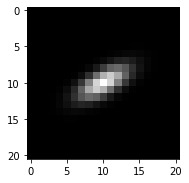

1.2889578720244308 , 2.066093672631776


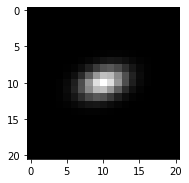

2.5783280300421776 , 2.0429393985010713


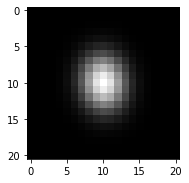

2.6851493531465445 , 1.723507863645831


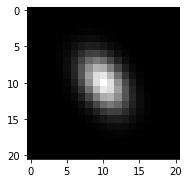

2.854124256546471 , 2.518488885002546


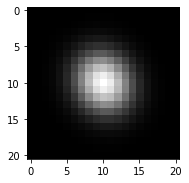

1.6482979360735381 , 2.7877547802313596


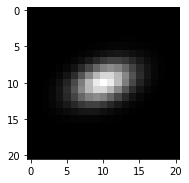

2.852082689605765 , 1.5282024539775114


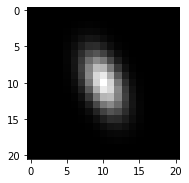

1.7293258729590177 , 1.3024721667828354


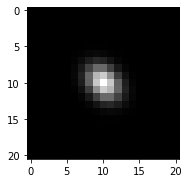

1.8568329411923528 , 1.5862130177672018


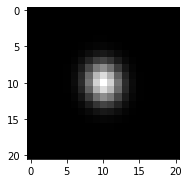

In [42]:
for i in range(len(test_ks['kernels'])):
    plt.subplot(121)
    plt.imshow(test_ks['kernels'][i].reshape(21, 21), cmap="gray")
    print(test_ks['stddevs'][i],",", test_ks['stddevs2'][i])
#     plt.subplot(122)
#     plt.imshow(test_ks['k_recon'][i].reshape(21, 21), cmap="gray")
    plt.show()